## **Librerías**

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.metrics import mean_squared_error

In [3]:
from scipy import stats

In [4]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [22]:
import itertools

## **Datos**

In [5]:
df_coffee = pd.read_csv('../Data/coffee_analysis.csv')

In [6]:
df_coffee.sample()

,name,roaster,roast,loc_country,origin_1,origin_2,100g_USD,rating,review_date,desc_1,desc_2,desc_3
347,Ethiopia Gugi,Topeca Coffee Roasters,Medium-Light,United States,Guji Zone,Southern Ethiopia,4.7,93,December 2018,"Fruit-toned, richly chocolaty. Dark chocolate,...",Southern Ethiopia coffees like this one are la...,"A cleanly crisp yet plushly fruit-toned, natur..."


In [7]:
# Exploramos nuestra variable objetivo
pd.DataFrame(df_coffee.value_counts('roast')).reset_index()

,roast,count
0,Medium-Light,1490
1,Light,287
2,Medium,259
3,Medium-Dark,39
4,Dark,5


In [8]:
work_df = df_coffee.query('roast in ("Medium-Light", "Light", "Medium")')

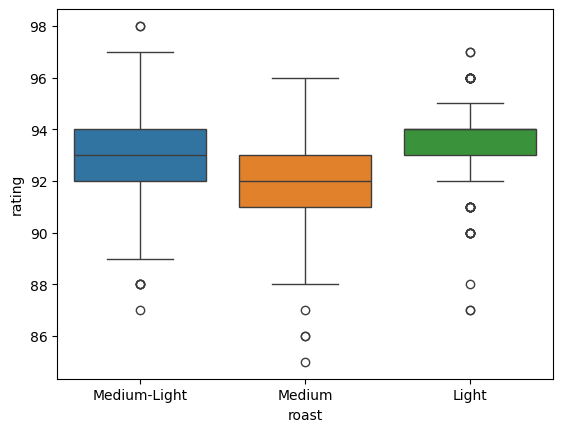

In [9]:
sns.boxplot(data=work_df, x='roast', y='rating', hue='roast')

plt.show()

## **ANOVA**

### **Definición de Hipótesis**

In [10]:
# Identificamos nuestros grupos/categorías
work_df['roast'].value_counts()

roast
Medium-Light    1490
Light            287
Medium           259
Name: count, dtype: int64

In [11]:
# Creamos listas para los registros numéricos de los grupos
medium_light_df = work_df.query('roast == "Medium-Light"')['rating']
medium_df = work_df.query('roast == "Medium"')['rating']
light_df = work_df.query('roast == "Light"')['rating']

In [12]:
# Aplicamos la formula del análisis de Varianza
resultados_anova = stats.f_oneway(medium_light_df, medium_df, light_df)

In [13]:
# Calculamos nuestros estadisticos
estadistico_f = resultados_anova.statistic
valor_p = resultados_anova.pvalue

In [14]:
# Evaluamos el p-value para determinar nuestras hipotesis
if valor_p < 0.05:
    print("Hay diferencias significativas entre al menos dos grupos.")
else:
    print("No hay evidencia suficiente para afirmar diferencias significativas entre los grupos.")

Hay diferencias significativas entre al menos dos grupos.


### **Tabla ANOVA**

In [15]:
# Creamos un dataframe con el grupo predictor y la variable que queremos predecir
data = work_df[['roast', 'rating']].query('roast in ("Medium-Light", "Medium", "Light")')

In [16]:
# Aplicamos nuestro modelo
modelo_anova = ols('rating ~ roast', data=data).fit()

In [19]:
# Generamos la tabla de resultados
tabla_anova = sm.stats.anova_lm(modelo_anova, typ=2)
tabla_anova

,sum_sq,df,F,PR(>F)
roast,247.171220,2.0,58.458423,2.065501e-25
Residual,4297.918662,2033.0,NaN,NaN


### **Pruebas T-Student**
Ahora queremos determinar la diferencia concreta entre un grupo contra los demás.

In [42]:
# Creamos una lista con las posibles combinaciones
grupos_unicos = data['roast'].unique()

combinaciones = list(itertools.combinations(list(grupos_unicos), 2))
combinaciones

[('Medium-Light', 'Medium'), ('Medium-Light', 'Light'), ('Medium', 'Light')]

In [50]:
# Definimos el nivel de significancia de nuestro ejercicio 
nivel_significancia = 0.05

In [53]:
# Inicializamos la variable donde se almacenaran los resultados
resultados_t = []

# Iteramos sobre las combinaciones posibles
for i in combinaciones:
    # Definimos los respectivos grupos
    grupo_1 = data.query(f'roast == "{i[0]}"')['rating']
    grupo_2 = data.query(f'roast == "{i[1]}"')['rating']

    # Calculamos nuestras estadisticas 
    t_statistic, p_value = stats.ttest_ind(grupo_1, grupo_2)
    
    # Definimos si se rechaza o no la hipótesis nula 
    rechazar_h0 = p_value < nivel_significancia

    if valor_p < 0.05:
        explicacion = ("Hay diferencias significativas")
    else:
        explicacion = ("No hay evidencia suficiente para afirmar diferencias significativas.")

    # Creamos un registro con la información obtenida
    resultados_t.append({
        'Grupos Comparados': f'{i[0]} vs {i[1]}',
        'Estadistico T': t_statistic,
        'P_Value': p_value,
        'Rechazar H0': rechazar_h0,
        'Explicación': explicacion
    })

# Creamos una tabla con los resultados 
tabla_resumen_t = pd.DataFrame(resultados_t)

In [54]:
tabla_resumen_t

,Grupos Comparados,Estadistico T,P_Value,Rechazar H0,Explicación
0,Medium-Light vs Medium,9.722248,8.548262e-22,True,Hay diferencias significativas
1,Medium-Light vs Light,-3.315067,9.346701e-04,True,Hay diferencias significativas
2,Medium vs Light,-8.822616,1.521855e-17,True,Hay diferencias significativas
